<a href="https://colab.research.google.com/github/sejallotliker/Machine_learning_practice/blob/main/K_means_clustering_algorithm_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means Clustering Algorithms implementation

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #Generates isotropic gaussian blobs for clustering
import pandas as pd
import numpy as np
%matplotlib inline

In [24]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=23)
#We will get 3 clusters!!!!


In [25]:
X.shape

(1000, 2)

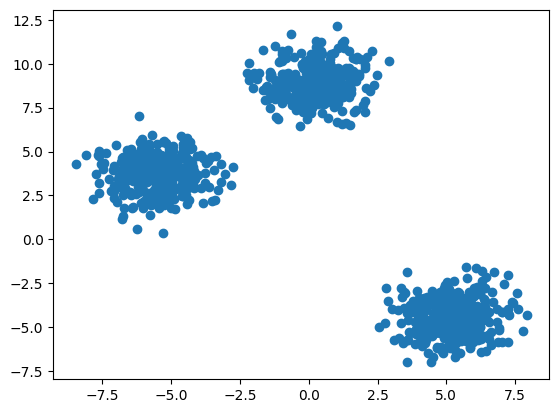

In [26]:
plt.scatter(X[:,0], X[:,1])

In [27]:
#To do train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [28]:
from sklearn.cluster import KMeans

In [29]:
#Elbow method to find k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [30]:
wcss

[34827.576825520235,
 7935.437286145425,
 1319.2730531585605,
 1140.4677884655134,
 1007.7307855664319,
 856.4010480159849,
 773.3007886035956,
 680.0890826946351,
 647.3034218905923,
 597.6597265798263]

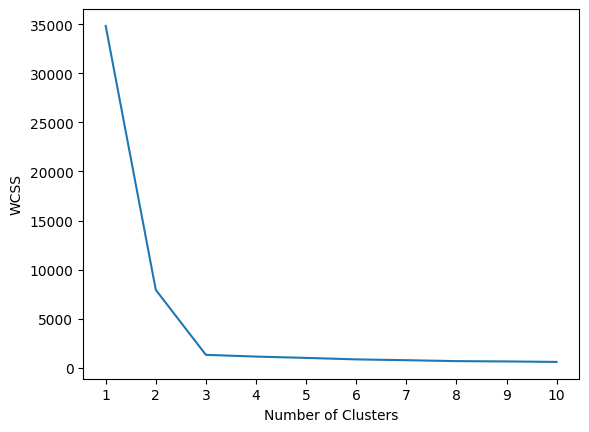

In [31]:
#To plot elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
#from elbow curve, we can see that the no. of clusters = 3

In [39]:
kmeans_model = KMeans(n_clusters = 3, init= "k-means++")

In [40]:
y_labels = kmeans_model.fit_predict(X_train)

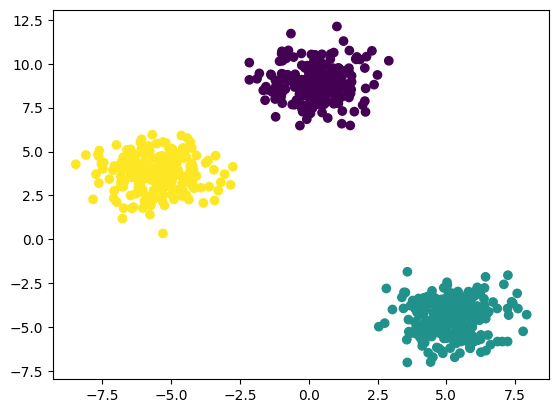

In [41]:
plt.scatter(X_train[:,0], X_train[:,1], c = y_labels)

In [42]:
y_test_labels = kmeans_model.predict(X_test)

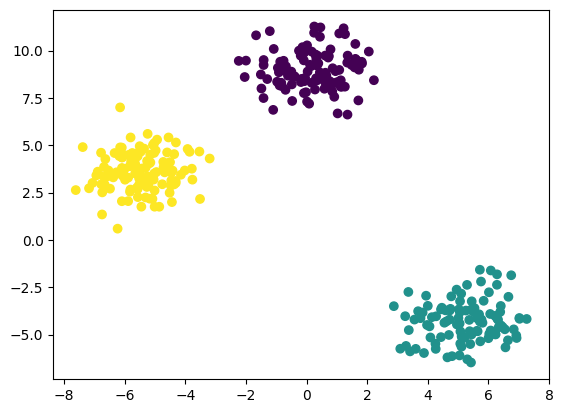

In [43]:
plt.scatter(X_test[:,0], X_test[:,1], c = y_test_labels)

In [44]:
#To automate the process of finding k value
#knee locator
!pip install kneed
from kneed import KneeLocator

In [49]:
k1 = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
k1.elbow

np.int64(3)

In [51]:
#Performance metrics
#Silhautte score
from sklearn.metrics import silhouette_score  #Ranges from -1 to 1
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  kmeans.fit(X_train)
  score = silhouette_score(X_train, kmeans.labels_)
  silhouette_coefficients.append(score)

In [52]:
silhouette_coefficients

[np.float64(0.7281443868598331),
 np.float64(0.8071181203797672),
 np.float64(0.6357733426488265),
 np.float64(0.4723297879921876),
 np.float64(0.33367872107343594),
 np.float64(0.32758752735600283),
 np.float64(0.33049705268923796),
 np.float64(0.3233874690312625),
 np.float64(0.32630032779404855)]

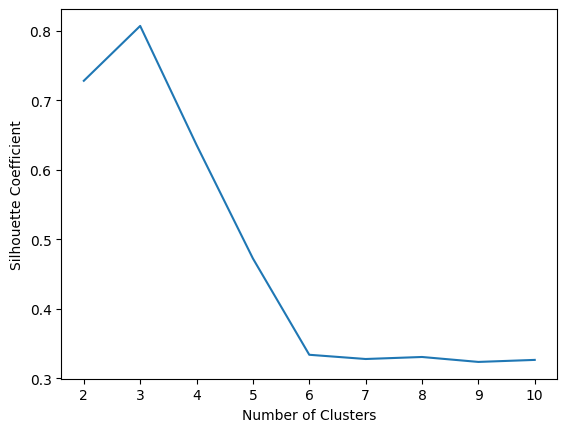

In [53]:
#Plotting silhouette score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

###This indicates that k = 3 is best !